# Data analysis of CAD dataset from https://github.com/dongpng/cad_naacl2021

In this notebook, we will conduct a data analysis of CAD (The Contextual Abuse Dataset). We will illustrate the main characteristics of this dataset, plot graphs and create functions to extract more information about these Reddit conversations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import json
import seaborn as sns

## Read the data

I downloaded the dataset from https://github.com/dongpng/cad_naacl. (PS: The cad_v1.tsv and cad_v1_1.tsv files are the same. :)) 

In [3]:
# Read the data contained in cad_v1 file
file_path = "../../data/cad_v1.tsv"

# Read the TSV file into a DataFrame
df_cad_v1 = pd.read_csv(file_path, sep='\t')
df_cad_v1['count'] = 1
df_cad_v1.head()

id      info_id   info_subreddit info_subreddit_id info_id.parent  \
0  cad_1  alywla-post            Drama          t5_2rd2l            NaN   
1  cad_2  am027u-post       conspiracy          t5_2qh4r            NaN   
2  cad_3  am80hq-post  subredditcancer          t5_2yv5q            NaN   
3  cad_4  amcs27-post            Drama          t5_2rd2l            NaN   
4  cad_5  aml76e-post            Drama          t5_2rd2l            NaN   

  info_id.link  info_thread.id info_order info_image.saved annotation_Primary  \
0          NaN               2    02-post                0            Neutral   
1          NaN               3    03-post                0            Neutral   
2          NaN               5    05-post                0            Neutral   
3          NaN               9    09-post                0            Neutral   
4          NaN              12    12-post                0            Neutral   

   ... annotation_highlighted        meta_author meta_created_utc  \
0  ...                    NaN          RedGT2033       1548999908   
1  ...                    NaN         G0LD3NDAWN       1549010283   
2  ...                    NaN  SpecialThrowaway6       1549062528   
3  ...                    NaN          [deleted]       1549101640   
4  ...                    NaN    KristenLuvsCATS       1549159930   

              meta_date              meta_day  \
0  2019-02-01T05:45:08Z  2019-02-01T00:00:00Z   
1  2019-02-01T08:38:03Z  2019-02-01T00:00:00Z   
2  2019-02-01T23:08:48Z  2019-02-01T00:00:00Z   
3  2019-02-02T10:00:40Z  2019-02-02T00:00:00Z   
4  2019-02-03T02:12:10Z  2019-02-03T00:00:00Z   

                                      meta_permalink          split  \
0  /r/Drama/comments/alywla/centrist_daddy_gets_d...  exclude_empty   
1  /r/conspiracy/comments/am027u/what_are_your_op...           test   
2  /r/subredditcancer/comments/am80hq/banned_and_...  exclude_empty   
3  /r/Drama/comments/amcs27/at_rworldnews_10_hour...  exclude_empty   
4  /r/Drama/comments/aml76e/guy_gets_in_trouble_w...  exclude_empty   

  subreddit_seen                                          meta_text count  
0              1                                                NaN     1  
1              0  . I just watched a 4 hour long disclosure buff...     1  
2              1                                                NaN     1  
3              1                                                NaN     1  
4              1                                                NaN     1  

[5 rows x 24 columns]

In [4]:
# Read the data contained in cad_v1_1 file
file_path = "../../data/cad_v1_1.tsv"

# Read the TSV file into a DataFrame
df_cad_v1_1 = pd.read_csv(file_path, sep='\t')
df_cad_v1_1['count'] = 1
df_cad_v1_1.head()

id      info_id   info_subreddit info_subreddit_id info_id.parent  \
0  cad_1  alywla-post            Drama          t5_2rd2l            NaN   
1  cad_2  am027u-post       conspiracy          t5_2qh4r            NaN   
2  cad_3  am80hq-post  subredditcancer          t5_2yv5q            NaN   
3  cad_4  amcs27-post            Drama          t5_2rd2l            NaN   
4  cad_5  aml76e-post            Drama          t5_2rd2l            NaN   

  info_id.link  info_thread.id info_order info_image.saved annotation_Primary  \
0          NaN               2    02-post                0            Neutral   
1          NaN               3    03-post                0            Neutral   
2          NaN               5    05-post                0            Neutral   
3          NaN               9    09-post                0            Neutral   
4          NaN              12    12-post                0            Neutral   

   ... annotation_highlighted        meta_author meta_created_utc  \
0  ...                    NaN          RedGT2033       1548999908   
1  ...                    NaN         G0LD3NDAWN       1549010283   
2  ...                    NaN  SpecialThrowaway6       1549062528   
3  ...                    NaN          [deleted]       1549101640   
4  ...                    NaN    KristenLuvsCATS       1549159930   

              meta_date              meta_day  \
0  2019-02-01T05:45:08Z  2019-02-01T00:00:00Z   
1  2019-02-01T08:38:03Z  2019-02-01T00:00:00Z   
2  2019-02-01T23:08:48Z  2019-02-01T00:00:00Z   
3  2019-02-02T10:00:40Z  2019-02-02T00:00:00Z   
4  2019-02-03T02:12:10Z  2019-02-03T00:00:00Z   

                                      meta_permalink          split  \
0  /r/Drama/comments/alywla/centrist_daddy_gets_d...  exclude_empty   
1  /r/conspiracy/comments/am027u/what_are_your_op...           test   
2  /r/subredditcancer/comments/am80hq/banned_and_...  exclude_empty   
3  /r/Drama/comments/amcs27/at_rworldnews_10_hour...  exclude_empty   
4  /r/Drama/comments/aml76e/guy_gets_in_trouble_w...  exclude_empty   

  subreddit_seen                                          meta_text count  
0              1                                                NaN     1  
1              0  . I just watched a 4 hour long disclosure buff...     1  
2              1                                                NaN     1  
3              1                                                NaN     1  
4              1                                                NaN     1  

[5 rows x 24 columns]

In [5]:
print(df_cad_v1.columns)
print(df_cad_v1_1.columns)


Index(['id', 'info_id', 'info_subreddit', 'info_subreddit_id',
       'info_id.parent', 'info_id.link', 'info_thread.id', 'info_order',
       'info_image.saved', 'annotation_Primary', 'annotation_Secondary',
       'annotation_Context', 'annotation_Target',
       'annotation_Target_top.level.category', 'annotation_highlighted',
       'meta_author', 'meta_created_utc', 'meta_date', 'meta_day',
       'meta_permalink', 'split', 'subreddit_seen', 'meta_text', 'count'],
      dtype='object')
Index(['id', 'info_id', 'info_subreddit', 'info_subreddit_id',
       'info_id.parent', 'info_id.link', 'info_thread.id', 'info_order',
       'info_image.saved', 'annotation_Primary', 'annotation_Secondary',
       'annotation_Context', 'annotation_Target',
       'annotation_Target_top.level.category', 'annotation_highlighted',
       'meta_author', 'meta_created_utc', 'meta_date', 'meta_day',
       'meta_permalink', 'split', 'subreddit_seen', 'meta_text', 'count'],
      dtype='object')


### Verify split counts

In [6]:
split_counts = df_cad_v1.groupby('split')['count'].sum()
print(split_counts)

split
dev               4684
exclude_bot        604
exclude_empty     2244
exclude_image        1
exclude_lang       353
test              5495
train            14113
Name: count, dtype: int64


In [7]:
split_counts = df_cad_v1_1.groupby('split')['count'].sum()
print(split_counts)

split
dev               4684
exclude_bot        604
exclude_empty     2244
exclude_image        1
exclude_lang       353
test              5495
train            14113
Name: count, dtype: int64


In [8]:
len(df_cad_v1_1['id'].unique())

27494

### Labels 

In [9]:
label_counts = df_cad_v1_1.groupby('annotation_Primary')['count'].sum() 
print(label_counts)

annotation_Primary
AffiliationDirectedAbuse     1349
CounterSpeech                 220
IdentityDirectedAbuse        2729
Neutral                     21935
PersonDirectedAbuse          1112
Slur                          149
Name: count, dtype: int64


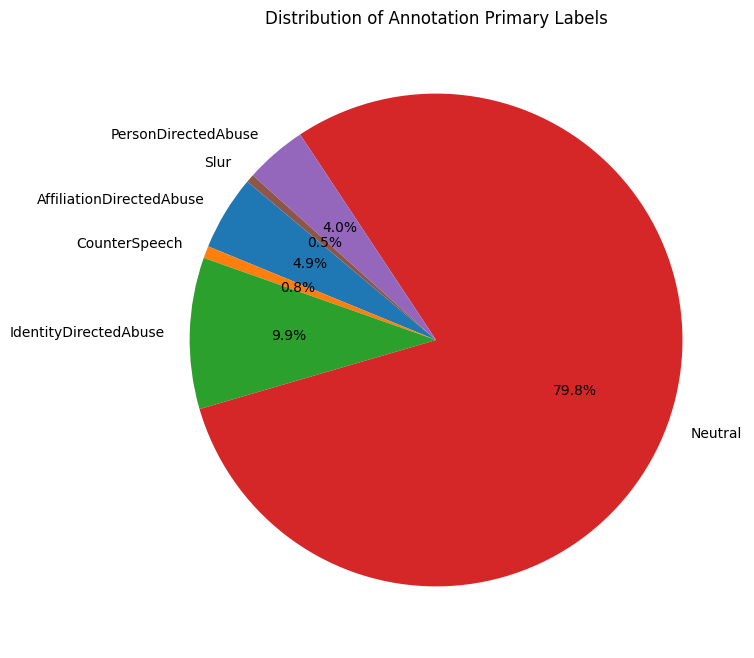

In [10]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Annotation Primary Labels')
plt.show()

### Subreddits

In [11]:
subreddits_cad = df_cad_v1_1.groupby('info_subreddit')['count'].sum()
print(subreddits_cad)

info_subreddit
4chan                    1168
CCJ2                      706
Drama                    3986
HateCrimeHoaxes           469
ImGoingToHellForThis     1251
Negareddit                807
ShitPoliticsSays         2576
SubredditDrama           3222
TrueOffMyChest           1107
TumblrInAction           4683
WatchRedditDie           1199
bakchodi                 1486
conspiracy               2600
imgoingtohellforthis2     167
smuggies                  742
subredditcancer          1325
Name: count, dtype: int64


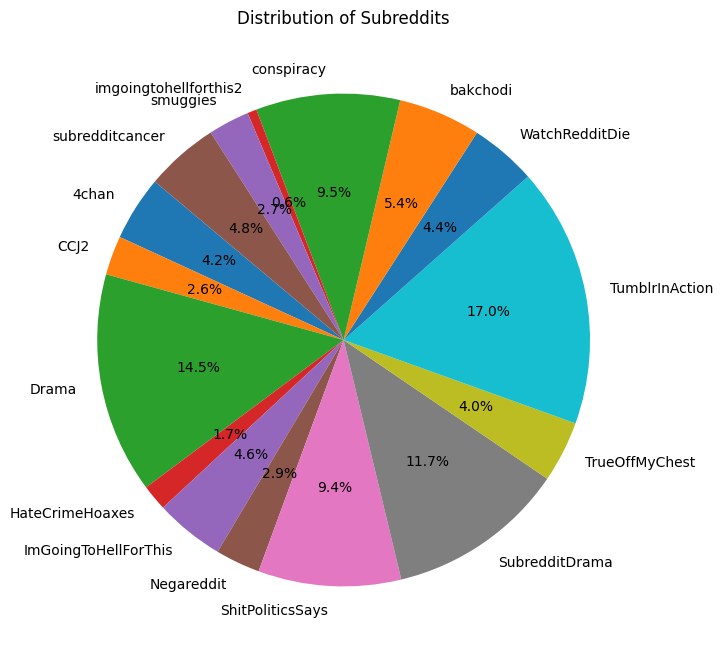

In [12]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(subreddits_cad, labels=subreddits_cad.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subreddits')
plt.show()

### Users

In [13]:
users_cad = df_cad_v1_1.groupby('meta_author')['count'].sum()
print(users_cad)

meta_author
--Edog--              4
--shaunoftheliving    1
-BTFraggerCS-         1
-DISNEY-              1
-Daetrax-             1
                     ..
zune13                1
zuudo                 1
zwiebelsaft           1
zwind                 1
zyklorpthehuman       2
Name: count, Length: 11123, dtype: int64


### Context

In [14]:
annotContext_cad = df_cad_v1_1.groupby('annotation_Context')['count'].sum()
print(annotContext_cad)

annotation_Context
CurrentContent     3993
PreviousContent    1566
Name: count, dtype: int64


### Date

In [15]:
day_cad = df_cad_v1_1.groupby('meta_day')['count'].sum()
print(day_cad)	

meta_day
2019-02-01T00:00:00Z     35
2019-02-02T00:00:00Z    157
2019-02-03T00:00:00Z    136
2019-02-04T00:00:00Z    166
2019-02-05T00:00:00Z    323
                       ... 
2020-06-30T00:00:00Z      3
2020-07-02T00:00:00Z      1
2020-07-05T00:00:00Z     10
2020-07-06T00:00:00Z      2
2020-07-15T00:00:00Z      1
Name: count, Length: 248, dtype: int64


## Extract ids and match against all subreddit content

In [16]:
df_cad_v1_1['id'] = df_cad_v1_1["info_id"].apply(lambda x: x.split('-')[0]) 	
df_cad_v1_1['id_type'] = df_cad_v1_1["info_id"].apply(lambda x: x.split('-')[1] if len(x.split('-')) > 1 else '')	

In [17]:
df_cad_v1_1.head()

id      info_id   info_subreddit info_subreddit_id info_id.parent  \
0  alywla  alywla-post            Drama          t5_2rd2l            NaN   
1  am027u  am027u-post       conspiracy          t5_2qh4r            NaN   
2  am80hq  am80hq-post  subredditcancer          t5_2yv5q            NaN   
3  amcs27  amcs27-post            Drama          t5_2rd2l            NaN   
4  aml76e  aml76e-post            Drama          t5_2rd2l            NaN   

  info_id.link  info_thread.id info_order info_image.saved annotation_Primary  \
0          NaN               2    02-post                0            Neutral   
1          NaN               3    03-post                0            Neutral   
2          NaN               5    05-post                0            Neutral   
3          NaN               9    09-post                0            Neutral   
4          NaN              12    12-post                0            Neutral   

   ...        meta_author meta_created_utc             meta_date  \
0  ...          RedGT2033       1548999908  2019-02-01T05:45:08Z   
1  ...         G0LD3NDAWN       1549010283  2019-02-01T08:38:03Z   
2  ...  SpecialThrowaway6       1549062528  2019-02-01T23:08:48Z   
3  ...          [deleted]       1549101640  2019-02-02T10:00:40Z   
4  ...    KristenLuvsCATS       1549159930  2019-02-03T02:12:10Z   

               meta_day                                     meta_permalink  \
0  2019-02-01T00:00:00Z  /r/Drama/comments/alywla/centrist_daddy_gets_d...   
1  2019-02-01T00:00:00Z  /r/conspiracy/comments/am027u/what_are_your_op...   
2  2019-02-01T00:00:00Z  /r/subredditcancer/comments/am80hq/banned_and_...   
3  2019-02-02T00:00:00Z  /r/Drama/comments/amcs27/at_rworldnews_10_hour...   
4  2019-02-03T00:00:00Z  /r/Drama/comments/aml76e/guy_gets_in_trouble_w...   

           split  subreddit_seen  \
0  exclude_empty               1   
1           test               0   
2  exclude_empty               1   
3  exclude_empty               1   
4  exclude_empty               1   

                                           meta_text count id_type  
0                                                NaN     1    post  
1  . I just watched a 4 hour long disclosure buff...     1    post  
2                                                NaN     1    post  
3                                                NaN     1    post  
4                                                NaN     1    post  

[5 rows x 25 columns]

In [18]:
print(df_cad_v1_1['id_type'].unique())

['post' '' 'title']


In [19]:
df_cad_final = ""

In [20]:
# CAD Dataframe, define the CAD dataframe that contains only train/dev and test splits
# I also modify few things in the dataframe to utilize it in the process_file code down the line
# This dataframe will be used to construct to check if a post or comment belong to CAD.

df_cad_final = df_cad_v1_1[df_cad_v1_1["split"].isin(["train", "test", "dev"])].copy()
df_cad_final["label"] = df_cad_final["annotation_Primary"]
df_cad_final.set_index('id', inplace=True)

In [21]:
df_cad_final

info_id        info_subreddit info_subreddit_id info_id.parent  \
id                                                                             
am027u    am027u-post            conspiracy          t5_2qh4r            NaN   
an4gkh    an4gkh-post        TrueOffMyChest          t5_2yuqy            NaN   
an8e3n    an8e3n-post            conspiracy          t5_2qh4r            NaN   
anmla4    anmla4-post        TrueOffMyChest          t5_2yuqy            NaN   
aobe00    aobe00-post        TrueOffMyChest          t5_2yuqy            NaN   
...               ...                   ...               ...            ...   
byw36e   byw36e-title                  CCJ2          t5_32cg1            NaN   
au160j   au160j-title  ImGoingToHellForThis          t5_2s7yq            NaN   
b63iy8   b63iy8-title            conspiracy          t5_2qh4r            NaN   
avrmje   avrmje-title      ShitPoliticsSays          t5_2vcl0            NaN   
eqcfrg6       eqcfrg6                 Drama          t5_2rd2l        eqaqxjk   

        info_id.link  info_thread.id    info_order info_image.saved  \
id                                                                    
am027u           NaN               3       03-post                0   
an4gkh           NaN              26       26-post                0   
an8e3n           NaN              33       33-post                0   
anmla4           NaN              37       37-post                0   
aobe00           NaN              49       49-post                0   
...              ...             ...           ...              ...   
byw36e           NaN            1113    1113-title                0   
au160j           NaN             210     210-title    imageNotSaved   
b63iy8           NaN             499     499-title                0   
avrmje           NaN             241     241-title                0   
eqcfrg6       bxz7if            1093  1093, 02, 03                0   

            annotation_Primary  \
id                               
am027u                 Neutral   
an4gkh                 Neutral   
an8e3n                 Neutral   
anmla4                 Neutral   
aobe00                 Neutral   
...                        ...   
byw36e   IdentityDirectedAbuse   
au160j   IdentityDirectedAbuse   
b63iy8                 Neutral   
avrmje     PersonDirectedAbuse   
eqcfrg6                Neutral   

                                      annotation_Secondary  ...  \
id                                                          ...   
am027u                                                 NaN  ...   
an4gkh                                                 NaN  ...   
an8e3n                                                 NaN  ...   
anmla4                                                 NaN  ...   
aobe00                                                 NaN  ...   
...                                                    ...  ...   
byw36e                   IdentityDirectedAbuse / animosity  ...   
au160j                  IdentityDirectedAbuse / derogation  ...   
b63iy8                                                 NaN  ...   
avrmje   PersonDirectedAbuse / about a person who is no...  ...   
eqcfrg6                                                NaN  ...   

        meta_created_utc             meta_date              meta_day  \
id                                                                     
am027u        1549010283  2019-02-01T08:38:03Z  2019-02-01T00:00:00Z   
an4gkh        1549304086  2019-02-04T18:14:46Z  2019-02-04T00:00:00Z   
an8e3n        1549326667  2019-02-05T00:31:07Z  2019-02-05T00:00:00Z   
anmla4        1549424663  2019-02-06T03:44:23Z  2019-02-06T00:00:00Z   
aobe00        1549590185  2019-02-08T01:43:05Z  2019-02-08T00:00:00Z   
...                  ...                   ...                   ...   
byw36e        1560161607  2020-06-10T00:01:15Z  2020-06-10T00:00:00Z   
au160j        1550962092  2020-02-23T00:01:15Z  2020-02-23T00:00:00Z   
b63iy8        

In [22]:
id_array = df_cad_final.index.values.tolist()

In [23]:
len(id_array)

24292

df_cad_final has 24,292 entries.

I am trying to check if it would be possible to extract all the conversations to augment the CAD dataset and allow us to run a contextual graph model on it. I will experiment with the subreddit that contains the most CAD entries: TumblrInAction. I have downloaded all the posts and comments from this subreddit from 2019-02-01 to 2020-07-15. The dumps are located in the data/subreddit_dumps folder.

There are 5985 Posts and 317136 Comments. Both of them where downloaded in minutes using https://arctic-shift.photon-reddit.com/download-tool.

### Load TumblrInAction submissions

In [36]:
tmblr_posts_file = "../../data/subreddit_dumps/r_TumblrInAction_posts.jsonl"
tmblr_posts_comments = "../../data/subreddit_dumps/r_TumblrInAction_comments.jsonl"

In [32]:
# Initialize a list to store the JSON objects
json_objects = []

# Open the jsonl file and read it line by line
with open(tmblr_posts_file, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse the JSON object from each line
        json_obj = json.loads(line.strip())
        # Add the JSON object to the list
        json_objects.append(json_obj)

print(len(json_objects))
# There are 5985 posts in the dataset 

5985


In [34]:
found, not_found = 0, 0
for obj in json_objects:
    my_id = obj['id']
    if my_id in id_array:
        found += 1
    else:
        not_found += 1
print(f"Found {found} posts out of {found + not_found}")

Found 95 posts out of 5985


In [37]:
# Initialize a list to store the JSON objects
json_objects = []

# Open the jsonl file and read it line by line
with open(tmblr_posts_comments, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse the JSON object from each line
        json_obj = json.loads(line.strip())
        # Add the JSON object to the list
        json_objects.append(json_obj)

print(len(json_objects))
# There are 317136 comments in the dataset 

317136


In [39]:
found, not_found = 0, 0
for obj in json_objects:
    my_id = obj['id']
    if my_id in id_array:
        found += 1
    else:
        not_found += 1
print(f"Found {found} comments out of {found + not_found}")

Found 4278 comments out of 317136


This is extremely promessing!!! :)

To summarize, the CAD dataset contains 4683 from the subreddit 'TumblrInAction'. By extracting the entire content of posts and comments from this subreddit during our time range of interessed, we found the values of 4278 comments and 95 posts ==> Which means 4373 out the 4683 ids we were looking for!


Let's now dump all of the matched comments and posts into a single jsonl file. 

In [40]:
tmblr_posts_out = "../../data/subreddit_dumps/TumblrInAction_posts_match_cad.jsonl"
tmblr_comments_out = "../../data/subreddit_dumps/TumblrInAction_comments_match_cad.jsonl"

with open(tmblr_comments_out, 'w', encoding='utf-8') as file_out:
    with open(tmblr_posts_comments, 'r', encoding='utf-8') as file:
        for line in file:
            # Parse the JSON object from each line
            json_obj = json.loads(line.strip())
            my_id = json_obj['id']
            if my_id in id_array:
                file_out.write(json.dumps(json_obj) + '\n')

with open(tmblr_posts_out, 'w', encoding='utf-8') as file_out:
    with open(tmblr_posts_file, 'r', encoding='utf-8') as file:
        for line in file:
            # Parse the JSON object from each line
            json_obj = json.loads(line.strip())
            my_id = json_obj['id']
            if my_id in id_array:
                file_out.write(json.dumps(json_obj) + '\n')


In [97]:
# get_label_for_id returns the label for an id using the df_cad_final dataframe (indexed by id).
def get_label_for_id(df, id_value):
    if id_value not in df.index:
        return 'NA'
    rows = df.loc[id_value, 'label']

    if isinstance(rows, pd.Series): # Check if there are different entries for the same id
        if rows.nunique() == 1:
           return rows.iloc[0]  # If all entries have the same label, return it
        else:
            return 'NA'  # Return 'PB' like Problem, if there are different entries with different labels for the same id
        #return 'NA'
    else:
        # If it's a single value, return it directly
        return rows


print(get_label_for_id(df_cad_final, 'au160j'))
print(get_label_for_id(df_cad_final, 'wrong_key'))

IdentityDirectedAbuse
NA


In [98]:

#{"data": {...."label": "NA"}, "tree": [ {"data": {...."label": "NA"}, "tree": []}] }}
def is_there_non_na_label(my_dic):
    if "data" in my_dic.keys() and "tree" in my_dic.keys(): #
        label = my_dic["data"].get("label", "NA")
        
        if label != "NA":
            return True
        if label == "NA" and len(my_dic["tree"]) == 0:
            return False
         
        for subtree in my_dic["tree"]:
            if is_there_non_na_label(subtree):
                return True

        return False




#{"data": {"all_awardings": [], "allow_live_comments": false, "archived": false, "author": "Anthro_DragonFerrite", "author_created_utc": 1480996651, "author_flair_background_color": null, "author_flair_css_class": null, "author_flair_richtext": [], "author_flair_template_id": "7980e198-31cb-11e2-a6a3-12313d051e91", "author_flair_text": "Androgynous Dragon", "author_flair_text_color": "dark", "author_flair_type": "text", "author_fullname": "t2_13cm6r", "author_patreon_flair": false, "can_gild": true, "can_mod_post": false, "category": null, "content_categories": null, "contest_mode": false, "created_utc": 1563148143, "discussion_type": null, "distinguished": null, "domain": "i.redd.it", "edited": false, "gilded": 0, "gildings": {}, "hidden": false, "id": "cda309", "is_crosspostable": true, "is_meta": false, "is_original_content": false, "is_reddit_media_domain": true, "is_robot_indexable": true, "is_self": false, "is_video": false, "link_flair_background_color": "", "link_flair_css_class": "four", "link_flair_richtext": [], "link_flair_template_id": "4ea07d7a-bf5c-11e2-8a23-12313d1841d1", "link_flair_text": "NOT TUMBLR", "link_flair_text_color": "dark", "link_flair_type": "text", "locked": false, "media": null, "media_embed": {}, "media_only": false, "no_follow": false, "num_comments": 27, "num_crossposts": 0, "over_18": false, "parent_whitelist_status": "no_ads", "permalink": "/r/TumblrInAction/comments/cda309/black_trans_death_wave/", "pinned": false, "post_hint": "image", "preview": {"enabled": true, "images": [{"id": "n_5I1B_4hxouT9-1NCESj9PYJfVwfs5rPpG4Pt2xr5Y", "resolutions": [{"height": 132, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=108&crop=smart&auto=webp&s=c06757568fd63dbe71174dafbdba9b37b3c48ebb", "width": 108}, {"height": 264, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=216&crop=smart&auto=webp&s=ab266019ac9c4a72f811b4faddc258565a469c86", "width": 216}, {"height": 391, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=320&crop=smart&auto=webp&s=401ced0762290a8cb830b24c4d9cb71c600134eb", "width": 320}, {"height": 782, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=640&crop=smart&auto=webp&s=bd581fcef0eed6bc8376287f581d1e1c286fc5a3", "width": 640}], "source": {"height": 880, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?auto=webp&s=60c7d8ca37ff4115bbf40377816da9978e7822ab", "width": 720}, "variants": {}}]}, "pwls": 0, "quarantine": false, "removal_reason": null, "retrieved_on": 1566923166, "score": 163, "secure_media": null, "secure_media_embed": {}, "selftext": "", "send_replies": true, "spoiler": false, "stickied": false, "subreddit": "TumblrInAction", "subreddit_id": "t5_2vizz", "subreddit_name_prefixed": "r/TumblrInAction", "subreddit_subscribers": 480844, "subreddit_type": "public", "suggested_sort": null, "thumbnail": "https://b.thumbs.redditmedia.com/T7Xrce9bh0sSepHNRw7IMVQX2ru78P9Zh7WPZFMAmHk.jpg", "thumbnail_height": 140, "thumbnail_width": 140, "title": "Black Trans Death Wave", "total_awards_received": 0, "url": "https://i.redd.it/hl6xu8lgwca31.jpg", "whitelist_status": "no_ads", "wls": 0, "name": "t3_cda309", "ups": 163, "upvote_ratio": 1, "label": "NA"}, "tree": [{"data": {"all_awardings": [], "associated_award": null, "author": "undetailed", "author_created_utc": 1518059646, "author_flair_background_color": null, "author_flair_css_class": "blue", "author_flair_richtext": [], "author_flair_template_id": "ec049b6a-5bcf-11e6-a2cb-0eee7ed1e83d", "author_flair_text": "You put an ANTI-TANK mine on the MAIN ROAD?!", "author_flair_text_color": "dark", "author_flair_type": "text", "author_fullname": "t2_vyv3d97", "author_patreon_flair": false, "awarders": [], "body": "they probably called the cops because she was trespassing", "can_gild": true, "can_mod_post": false, "collapsed": false, "collapsed_reason": null, "controversiality": 0, "created_utc": 1563148358, "distinguished": null, "edited": false, "gilded": 0, "gildings": {}, "id": "etskyad", "is_submitter": false, "link_id": "t3_cda309", "locked": false, "no_follow": false, "parent_id": "cda309", "permalink": "/r/TumblrInAction/comments/cda309/black_trans_death_wave/etskyad/", "quarantined": false, "removal_reason": null, "retrieved_on": 1572015271, "score": 48, "send_replies": true, "steward_reports": [], "stickied": false, "subreddit": "TumblrInAction", "subreddit_id": "t5_2vizz", "subreddit_name_prefixed": "r/TumblrInAction", "subreddit_type": "public", "total_awards_received": 0, "name": "t1_etskyad", "ups": 48, "label": "NA"}, "tree": [], "id": "etskyad"}], "id": "cda309"}    

In [106]:
def count_size_of_tree(x):
    return sum([count_size_of_tree(y) for y in x['tree']]) + 1
  
def process_file(path, subreddit):
    with open(f'{path}complete-graphs-{subreddit}.jsonl', 'w') as write:
        labels = 0
        label_link_ids = {}
        #for file in tqdm(list(glob('*-*-comments.json'))):
        
        posts = path + "r_" + subreddit + "_posts.jsonl"
        comments = path + "r_" + subreddit + "_comments.jsonl"
        
        graph = {}
        counts = {}
        post_matches = 0
        # First, we process the posts. The posts have no parent (by definition)
        for line in open(posts, 'r'):
            if line == '\n':
                continue
            data = json.loads(line.strip())
            link_id = data['id']
            label = get_label_for_id(df_cad_final, link_id)
            data['label'] = label
            if data['label'] != 'NA':
                labels += 1
                label_link_ids[link_id] = True

            graph[link_id] = {link_id: {'data': data, 'tree': [], 'id': link_id}}
            counts[link_id] = 1
        # Then, we process the comments. The comments always have parents
        missing = []
        for line in open(comments, 'r'):
            if line == '\n':
                continue
            node = json.loads(line.strip())
            parent_id = node['parent_id'][3:]
            node['parent_id'] = parent_id
            link_id = node['link_id'][3:]
            if link_id not in graph:
                continue
            node_label = get_label_for_id(df_cad_final, node['id'])
            node['label'] = node_label
            if node['label'] != 'NA':
                labels += 1
                label_link_ids[link_id] = True

            graph[link_id][node['id']] = {'data': node, 'tree': [], 'id': node['id']}
            if parent_id in graph[link_id]:
                graph[link_id][parent_id]['tree'] += [graph[link_id][node['id']]]
                counts[link_id] += 1
            else:
                missing += [(link_id, parent_id, graph[link_id][node['id']])]
        # populate missing nodes in trees
        for link_id, parent_id, data in missing:
            if parent_id in graph[link_id]:
                graph[link_id][parent_id]['tree'] += [data]
                counts[link_id] += 1
            
                    
        for key, data in graph.items():
            if key in label_link_ids.keys() and label_link_ids[key]:
                write.write(json.dumps(data[key]) + '\n')
            if counts[key] != count_size_of_tree(data[key]):
                print(counts[key], count_size_of_tree(data[key]))
    return labels, len(label_link_ids.keys())


In [26]:
path = "../../data/subreddit_dumps/"
subreddit = "TumblrInAction"

subreddits = ["4chan", "CCJ2", "Drama", "HateCrimeHoaxes", "ImGoingToHellForThis", "Negareddit", "ShitPoliticsSays", "SubredditDrama"]
subreddits2 = ["TrueOffMyChest", "WatchRedditDie", "bakchodi"] 
subreddits3 = ["conspiracy", "imgoingtohellforthis2", "smuggies", "subredditcancer"]

for sub in subreddits3:
    print(f"processing {sub}...")
    num_labels, num_convs = process_file(path, sub)
    print(f"subreddit {sub}: outputs {num_labels} labels and {num_convs} conversations")

#process_file(path, subreddit)

processing conspiracy...


NameError: name 'process_file' is not defined

subreddit TumblrInAction: outputs 4208 labels in 96 conversations
subreddit 4chan: outputs 935 labels and 78 conversations
subreddit CCJ2: outputs 567 labels and 44 conversations
subreddit Drama: outputs 2947 labels and 145 conversations
subreddit HateCrimeHoaxes: outputs 400 labels and 41 conversations
subreddit ImGoingToHellForThis: outputs 925 labels and 104 conversations
subreddit Negareddit: outputs 668 labels and 43 conversations
subreddit ShitPoliticsSays: outputs 2223 labels and 100 conversations
subreddit SubredditDrama: outputs 2842 labels and 96 conversations
subreddit conspiracy: outputs 2134 labels and 143 conversations
subreddit imgoingtohellforthis2: outputs 130 labels and 31 conversations
subreddit smuggies: outputs 629 labels and 38 conversations
subreddit subredditcancer: outputs 1031 labels and 106 conversations


This took 1 minute 32 seconds to run, not bad :).
The complete graph file contains 5986 entries. This is more than the number of entries we are supposed to get. 

This is the number of posts in this subreddit. This is expected. But the nomber of labels is 4208. The rest of the posts should be removed or disrgarded in a later step.

In [115]:
#res = Parallel(n_jobs=-1)(delayed(process_file)(file, i) for i, file in tqdm(enumerate(list(glob('*-*-comments.json'))), total=144))

all_subreddits = ["4chan", "CCJ2", "Drama", "HateCrimeHoaxes", "ImGoingToHellForThis", "Negareddit", "ShitPoliticsSays", "SubredditDrama", "TumblrInAction", "TrueOffMyChest", "WatchRedditDie", "bakchodi", "conspiracy", "imgoingtohellforthis2", "smuggies", "subredditcancer"]
num_convs = 0
with open('complete-graphs.jsonl', 'w') as file:
    for graph_file in [path + 'complete-graphs-' + sub + '.jsonl' for sub in all_subreddits]:
        with open(graph_file, 'r') as read:
            for line in read:
                num_convs +=1
                file.write(line)
print('Total number conversations is : ', num_convs)


Total number conversations is :  1383


### Data Augmentation 

Now that we gathered all the Reddit conversations data for CAD, we want to add pieces of information coming from the CAD data itself to augment the Reddit data. Especially, we want to add 'annotation_Context'.

In [45]:
path = "../../data/subreddit_dumps/"

def aug_conv(conv, df):
    assert "data" in conv.keys() and "tree" in conv.keys(), "weird struct" #
    conv["data"] = aug_data(conv["data"], df)
        
    if len(conv["tree"]) == 0:
        return conv
         
    for subtree in conv["tree"]:
        subtree = aug_conv(subtree, df)
    return conv

def get_value_from_rows(rows):
    if isinstance(rows, pd.Series):
        if rows.nunique() == 1:
            return rows.iloc[0]  # If all entries have the same label, return it
        else:
            return 'NA' 
    else:
        # If it's a single value, return it directly
        return rows

def aug_data(data, df):
    if data is None:
        return data
    my_id = data["id"]
    if my_id in df.index:
        rows_ctx = df.loc[my_id, 'annotation_Context']
        ctx = get_value_from_rows(rows_ctx)
        rows_tgt = df.loc[my_id, 'annotation_Target']
        tgt = get_value_from_rows(rows_tgt)
        rows_tgt_cat = df.loc[my_id, 'annotation_Target_top.level.category']
        tgt_cat = get_value_from_rows(rows_tgt_cat)
        rows_split = df.loc[my_id, 'split']
        split = get_value_from_rows(rows_split)
        data["anno_ctx"] = ctx if str(ctx).lower() != "nan" else "NA"
        data["anno_tgt"] = tgt if str(tgt).lower() != "nan" else "NA"
        data["anno_tgt_cat"] = tgt_cat if str(tgt_cat).lower() != "nan" else "NA"
        data["split"] = split if str(split).lower() != "nan" else "NA"
    else:
        data["anno_ctx"] = "NA"
        data["anno_tgt"] = "NA"
        data["anno_tgt_cat"] = "NA"
        data["split"] = "NA"
    return data


In [46]:
with open(path + 'complete-graphs-aug.jsonl', 'w') as out_file:
    with open(path + 'complete-graphs.jsonl', 'r') as in_file:
        for line in in_file:
            conv = json.loads(line.strip())
            conv = aug_conv(conv, df_cad_final)
            out_file.write(json.dumps(conv) + '\n')
            #write.write(json.dumps(conv) + '\n')
            

## Data Analysis and Statistics

In [47]:
#{"data": {"all_awardings": [], "allow_live_comments": false, "archived": false, "author": "Anthro_DragonFerrite", "author_created_utc": 1480996651, "author_flair_background_color": null, "author_flair_css_class": null, "author_flair_richtext": [], "author_flair_template_id": "7980e198-31cb-11e2-a6a3-12313d051e91", "author_flair_text": "Androgynous Dragon", "author_flair_text_color": "dark", "author_flair_type": "text", "author_fullname": "t2_13cm6r", "author_patreon_flair": false, "can_gild": true, "can_mod_post": false, "category": null, "content_categories": null, "contest_mode": false, "created_utc": 1563148143, "discussion_type": null, "distinguished": null, "domain": "i.redd.it", "edited": false, "gilded": 0, "gildings": {}, "hidden": false, "id": "cda309", "is_crosspostable": true, "is_meta": false, "is_original_content": false, "is_reddit_media_domain": true, "is_robot_indexable": true, "is_self": false, "is_video": false, "link_flair_background_color": "", "link_flair_css_class": "four", "link_flair_richtext": [], "link_flair_template_id": "4ea07d7a-bf5c-11e2-8a23-12313d1841d1", "link_flair_text": "NOT TUMBLR", "link_flair_text_color": "dark", "link_flair_type": "text", "locked": false, "media": null, "media_embed": {}, "media_only": false, "no_follow": false, "num_comments": 27, "num_crossposts": 0, "over_18": false, "parent_whitelist_status": "no_ads", "permalink": "/r/TumblrInAction/comments/cda309/black_trans_death_wave/", "pinned": false, "post_hint": "image", "preview": {"enabled": true, "images": [{"id": "n_5I1B_4hxouT9-1NCESj9PYJfVwfs5rPpG4Pt2xr5Y", "resolutions": [{"height": 132, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=108&crop=smart&auto=webp&s=c06757568fd63dbe71174dafbdba9b37b3c48ebb", "width": 108}, {"height": 264, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=216&crop=smart&auto=webp&s=ab266019ac9c4a72f811b4faddc258565a469c86", "width": 216}, {"height": 391, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=320&crop=smart&auto=webp&s=401ced0762290a8cb830b24c4d9cb71c600134eb", "width": 320}, {"height": 782, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?width=640&crop=smart&auto=webp&s=bd581fcef0eed6bc8376287f581d1e1c286fc5a3", "width": 640}], "source": {"height": 880, "url": "https://preview.redd.it/hl6xu8lgwca31.jpg?auto=webp&s=60c7d8ca37ff4115bbf40377816da9978e7822ab", "width": 720}, "variants": {}}]}, "pwls": 0, "quarantine": false, "removal_reason": null, "retrieved_on": 1566923166, "score": 163, "secure_media": null, "secure_media_embed": {}, "selftext": "", "send_replies": true, "spoiler": false, "stickied": false, "subreddit": "TumblrInAction", "subreddit_id": "t5_2vizz", "subreddit_name_prefixed": "r/TumblrInAction", "subreddit_subscribers": 480844, "subreddit_type": "public", "suggested_sort": null, "thumbnail": "https://b.thumbs.redditmedia.com/T7Xrce9bh0sSepHNRw7IMVQX2ru78P9Zh7WPZFMAmHk.jpg", "thumbnail_height": 140, "thumbnail_width": 140, "title": "Black Trans Death Wave", "total_awards_received": 0, "url": "https://i.redd.it/hl6xu8lgwca31.jpg", "whitelist_status": "no_ads", "wls": 0, "name": "t3_cda309", "ups": 163, "upvote_ratio": 1, "label": "NA"}, "tree": [{"data": {"all_awardings": [], "associated_award": null, "author": "undetailed", "author_created_utc": 1518059646, "author_flair_background_color": null, "author_flair_css_class": "blue", "author_flair_richtext": [], "author_flair_template_id": "ec049b6a-5bcf-11e6-a2cb-0eee7ed1e83d", "author_flair_text": "You put an ANTI-TANK mine on the MAIN ROAD?!", "author_flair_text_color": "dark", "author_flair_type": "text", "author_fullname": "t2_vyv3d97", "author_patreon_flair": false, "awarders": [], "body": "they probably called the cops because she was trespassing", "can_gild": true, "can_mod_post": false, "collapsed": false, "collapsed_reason": null, "controversiality": 0, "created_utc": 1563148358, "distinguished": null, "edited": false, "gilded": 0, "gildings": {}, "id": "etskyad", "is_submitter": false, "link_id": "t3_cda309", "locked": false, "no_follow": false, "parent_id": "cda309", "permalink": "/r/TumblrInAction/comments/cda309/black_trans_death_wave/etskyad/", "quarantined": false, "removal_reason": null, "retrieved_on": 1572015271, "score": 48, "send_replies": true, "steward_reports": [], "stickied": false, "subreddit": "TumblrInAction", "subreddit_id": "t5_2vizz", "subreddit_name_prefixed": "r/TumblrInAction", "subreddit_type": "public", "total_awards_received": 0, "name": "t1_etskyad", "ups": 48, "label": "NA"}, "tree": [], "id": "etskyad"}], "id": "cda309"}    

def add_stats(my_stats, data):
    if data is None:
        return my_stats
    if len(my_stats.keys()) == 0:
        label = data.get("label", "NA")
        my_stats = {
            "comments": 1, 
            "num_labels": 0 if label == "NA" else 1,
            "ids": [data["id"]],
            "scores": [data["id"]],
            "authors": [data["author"]],
            "labels": [label], 
            "num_comments": data["num_comments"],
            "anno_ctx" : [data["anno_ctx"]],
            "anno_tgt" : [data["anno_tgt"]],
            "anno_tgt_cat" : [data["anno_tgt_cat"]],
        }
    else:
        my_stats["comments"] += 1
        if data["label"] != "NA":
            my_stats["num_labels"] += 1
        my_stats["ids"].append(data["id"])
        my_stats["scores"].append(data["score"])
        my_stats["authors"].append(data["author"])
        my_stats["labels"].append(data["label"])
        my_stats["anno_ctx"].append(data["anno_ctx"])
        my_stats["anno_tgt"].append(data["anno_tgt"])
        my_stats["anno_tgt_cat"].append(data["anno_tgt_cat"])
    return my_stats


def get_stats(my_dic, my_stats):
    assert "data" in my_dic.keys() and "tree" in my_dic.keys(), "weird struct" #
    my_stats = add_stats(my_stats, my_dic["data"])
        
    if len(my_dic["tree"]) == 0:
        return my_stats
         
    for subtree in my_dic["tree"]:
        my_stats = get_stats(subtree, my_stats)
    return my_stats


In [48]:
all_stats = []
with open(path + 'complete-graphs-aug.jsonl', 'r') as read:
    for line in read:
        conv = json.loads(line.strip())
        stats = get_stats(conv, {})
        all_stats.append(stats)


In [4]:
print("hllbo")

hllbo


In [49]:
print(all_stats)
df_stats = pd.DataFrame(all_stats)

[{'comments': 3, 'num_labels': 1, 'ids': ['alxkk7', 'efiadyw', 'efjq7ca'], 'scores': ['alxkk7', 8, 2], 'authors': ['DolanDukIsMe', 'chumpwithnoname', 'MrLohr'], 'labels': ['Neutral', 'NA', 'NA'], 'num_comments': 2, 'anno_ctx': ['NA', 'CurrentContent', 'NA'], 'anno_tgt': ['NA', 'gay men', 'NA'], 'anno_tgt_cat': ['NA', 'sexuality, gender', 'NA']}, {'comments': 5, 'num_labels': 5, 'ids': ['amce3s', 'efl55xi', 'efm0fxm', 'efnctsj', 'efo5vtt'], 'scores': ['amce3s', 5, 3, 15, 5], 'authors': ['-acon-trash', 'rm0234', 'matchatea1332', 'A1122334455667788991', 'Tankerchief85'], 'labels': ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral'], 'num_comments': 4, 'anno_ctx': ['NA', 'NA', 'NA', 'NA', 'NA'], 'anno_tgt': ['NA', 'NA', 'NA', 'NA', 'NA'], 'anno_tgt_cat': ['NA', 'NA', 'NA', 'NA', 'NA']}, {'comments': 4, 'num_labels': 4, 'ids': ['amxzr7', 'efptv96', 'efpye2a', 'efpygzy'], 'scores': ['amxzr7', 0, 2, 1], 'authors': ['NintenZX', 'kostakis81', 'azurecyan', 'Rabiddd'], 'labels': ['Neutral', '

In [50]:
df_stats.head()

comments  num_labels                                                ids  \
0         3           1                         [alxkk7, efiadyw, efjq7ca]   
1         5           5       [amce3s, efl55xi, efm0fxm, efnctsj, efo5vtt]   
2         4           4                [amxzr7, efptv96, efpye2a, efpygzy]   
3       128          88  [an7tsk, efrd939, efrg1so, efs995h, efsb8ru, e...   
4       168          70  [anszg4, efvr9hu, efvu4qz, efvuhv8, efvv17u, e...   

                                              scores  \
0                                     [alxkk7, 8, 2]   
1                              [amce3s, 5, 3, 15, 5]   
2                                  [amxzr7, 0, 2, 1]   
3  [an7tsk, 532, 155, 17, 15, 5, 1, 3, 9, 1, 1, 2...   
4  [anszg4, 183, 169, 69, 61, 112, 13, 11, 49, 37...   

                                             authors  \
0            [DolanDukIsMe, chumpwithnoname, MrLohr]   
1  [-acon-trash, rm0234, matchatea1332, A11223344...   
2         [NintenZX, kostakis81, azurecyan, Rabiddd]   
3  [TheArticFax, VitalLick_ButterIn, GodsAreTired...   
4  [RSAStudioGames, Daymandayman, hoaneatsthevoid...   

                                              labels  num_comments  \
0                                  [Neutral, NA, NA]             2   
1      [Neutral, Neutral, Neutral, Neutral, Neutral]             4   
2               [Neutral, Neutral, Neutral, Neutral]             3   
3  [Neutral, IdentityDirectedAbuse, Neutral, Neut...           122   
4  [Neutral, Neutral, Neutral, Neutral, NA, NA, N...           156   

                                            anno_ctx  \
0                           [NA, CurrentContent, NA]   
1                               [NA, NA, NA, NA, NA]   
2                                   [NA, NA, NA, NA]   
3  [NA, CurrentContent, NA, NA, NA, NA, NA, NA, C...   
4  [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...   

                                            anno_tgt  \
0                                  [NA, gay men, NA]   
1                               [NA, NA, NA, NA, NA]   
2                                   [NA, NA, NA, NA]   
3  [NA, people with autism, NA, NA, NA, NA, NA, N...   
4  [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...   

                                        anno_tgt_cat  
0                        [NA, sexuality, gender, NA]  
1                               [NA, NA, NA, NA, NA]  
2                                   [NA, NA, NA, NA]  
3  [NA, ableness/disability, NA, NA, NA, NA, NA, ...  
4  [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...

In [58]:
def count_na_labels(label_list):
    return label_list.count("NA")

df_stats["num_na_labels"] = df_stats["labels"].apply(count_na_labels)

def count_non_na_labels(label_list):
    return sum(1 for label in label_list if label != "NA")

df_stats["num_non_na_labels"] = df_stats["labels"].apply(count_non_na_labels)



In [61]:
df_stats.head()

comments  num_labels                                                ids  \
0         3           1                         [alxkk7, efiadyw, efjq7ca]   
1         5           5       [amce3s, efl55xi, efm0fxm, efnctsj, efo5vtt]   
2         4           4                [amxzr7, efptv96, efpye2a, efpygzy]   
3       128          88  [an7tsk, efrd939, efrg1so, efs995h, efsb8ru, e...   
4       168          70  [anszg4, efvr9hu, efvu4qz, efvuhv8, efvv17u, e...   

                                              scores  \
0                                     [alxkk7, 8, 2]   
1                              [amce3s, 5, 3, 15, 5]   
2                                  [amxzr7, 0, 2, 1]   
3  [an7tsk, 532, 155, 17, 15, 5, 1, 3, 9, 1, 1, 2...   
4  [anszg4, 183, 169, 69, 61, 112, 13, 11, 49, 37...   

                                             authors  \
0            [DolanDukIsMe, chumpwithnoname, MrLohr]   
1  [-acon-trash, rm0234, matchatea1332, A11223344...   
2         [NintenZX, kostakis81, azurecyan, Rabiddd]   
3  [TheArticFax, VitalLick_ButterIn, GodsAreTired...   
4  [RSAStudioGames, Daymandayman, hoaneatsthevoid...   

                                              labels  num_comments  \
0                                  [Neutral, NA, NA]             2   
1      [Neutral, Neutral, Neutral, Neutral, Neutral]             4   
2               [Neutral, Neutral, Neutral, Neutral]             3   
3  [Neutral, IdentityDirectedAbuse, Neutral, Neut...           122   
4  [Neutral, Neutral, Neutral, Neutral, NA, NA, N...           156   

                                            anno_ctx  \
0                           [NA, CurrentContent, NA]   
1                               [NA, NA, NA, NA, NA]   
2                                   [NA, NA, NA, NA]   
3  [NA, CurrentContent, NA, NA, NA, NA, NA, NA, C...   
4  [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...   

                                            anno_tgt  \
0                                  [NA, gay men, NA]   
1                               [NA, NA, NA, NA, NA]   
2                                   [NA, NA, NA, NA]   
3  [NA, people with autism, NA, NA, NA, NA, NA, N...   
4  [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...   

                                        anno_tgt_cat  num_na_labels  \
0                        [NA, sexuality, gender, NA]              2   
1                               [NA, NA, NA, NA, NA]              0   
2                                   [NA, NA, NA, NA]              0   
3  [NA, ableness/disability, NA, NA, NA, NA, NA, ...             40   
4  [NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...             98   

   num_non_na_labels  
0                  1  
1                  5  
2                  4  
3                 88  
4                 70

In [53]:
all_stats

[{'comments': 3,
  'num_labels': 1,
  'ids': ['alxkk7', 'efiadyw', 'efjq7ca'],
  'scores': ['alxkk7', 8, 2],
  'authors': ['DolanDukIsMe', 'chumpwithnoname', 'MrLohr'],
  'labels': ['Neutral', 'NA', 'NA'],
  'num_comments': 2,
  'anno_ctx': ['NA', 'CurrentContent', 'NA'],
  'anno_tgt': ['NA', 'gay men', 'NA'],
  'anno_tgt_cat': ['NA', 'sexuality, gender', 'NA']},
 {'comments': 5,
  'num_labels': 5,
  'ids': ['amce3s', 'efl55xi', 'efm0fxm', 'efnctsj', 'efo5vtt'],
  'scores': ['amce3s', 5, 3, 15, 5],
  'authors': ['-acon-trash',
   'rm0234',
   'matchatea1332',
   'A1122334455667788991',
   'Tankerchief85'],
  'labels': ['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral'],
  'num_comments': 4,
  'anno_ctx': ['NA', 'NA', 'NA', 'NA', 'NA'],
  'anno_tgt': ['NA', 'NA', 'NA', 'NA', 'NA'],
  'anno_tgt_cat': ['NA', 'NA', 'NA', 'NA', 'NA']},
 {'comments': 4,
  'num_labels': 4,
  'ids': ['amxzr7', 'efptv96', 'efpye2a', 'efpygzy'],
  'scores': ['amxzr7', 0, 2, 1],
  'authors': ['NintenZX', 'kos